In [ ]:
!pip install numpy==1.26.4 rdkit-pypi

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
def cir_query(name, representation="smiles"):
    import requests
    url = f"https://cactus.nci.nih.gov/chemical/structure/{name}/{representation}"
    r = requests.get(url)
    return r.text if r.ok else None

smiles = cir_query("ibuprofen")
print(smiles)


CC(C)Cc1ccc(cc1)C(C)C(O)=O


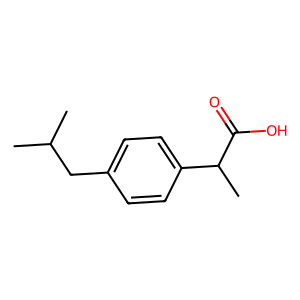

In [4]:
# Convert to RDKit molecule and draw
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [5]:
from rdkit.Chem import Descriptors

print("Molecular Weight:", Descriptors.MolWt(mol))
print("logP (Octanol/Water):", Descriptors.MolLogP(mol))
print("Number of H-bond donors:", Descriptors.NumHDonors(mol))
print("Number of H-bond acceptors:", Descriptors.NumHAcceptors(mol))
print("TPSA (Polar Surface Area):", Descriptors.TPSA(mol))
print("Rotatable Bonds:", Descriptors.NumRotatableBonds(mol))
print("Num Aromatic Rings:", Descriptors.NumAromaticRings(mol))


Molecular Weight: 206.28499999999997
logP (Octanol/Water): 3.073200000000001
Number of H-bond donors: 1
Number of H-bond acceptors: 1
TPSA (Polar Surface Area): 37.3
Rotatable Bonds: 4
Num Aromatic Rings: 1


In [6]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

import requests

# Helper function to get SMILES from CIR
def cir_query(name, representation="smiles"):
    url = f"https://cactus.nci.nih.gov/chemical/structure/{name}/{representation}"
    r = requests.get(url)
    return r.text if r.ok else None

# Define names
names = ["ibuprofen", "aspirin", "paracetamol", "caffeine", "naproxen", "cyclosporine"]

# Get molecules from names using CIR
smiles_list = [cir_query(name) for name in names]
mols = [Chem.MolFromSmiles(sm) if sm else None for sm in smiles_list]

# Filter out any None (failed lookups)
valid = [(name, mol) for name, mol in zip(names, mols) if mol is not None]
names, mols = zip(*valid)

# Generate Morgan fingerprints (ECFP4)
fps = [AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=2048) for m in mols]

# Similarity to ibuprofen (first entry)
similarities = [DataStructs.TanimotoSimilarity(fps[0], fp) for fp in fps]

# Show results
for name, sim in zip(names, similarities):
    print(f"{name.capitalize():<15}: similarity = {sim:.3f}")



Ibuprofen      : similarity = 1.000
Aspirin        : similarity = 0.195
Paracetamol    : similarity = 0.184
Caffeine       : similarity = 0.087
Naproxen       : similarity = 0.421
Cyclosporine   : similarity = 0.088


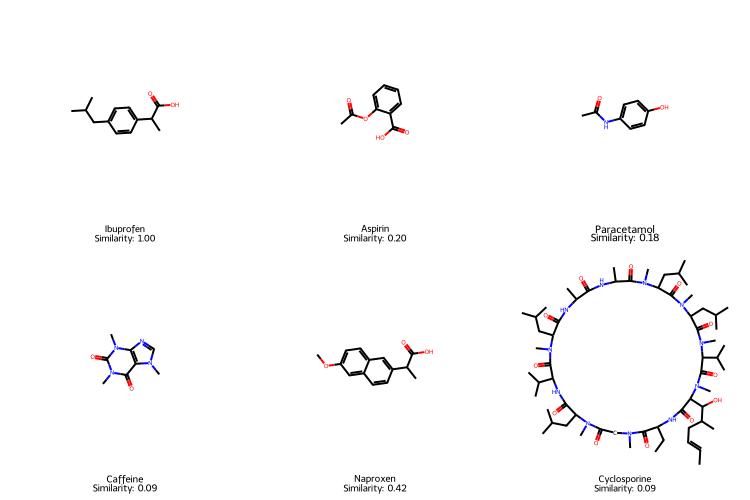

In [7]:
from rdkit.Chem import Draw

# Add similarity scores as legends
legends = [f"{name.capitalize()}\nSimilarity: {sim:.2f}" for name, sim in zip(names, similarities)]

# Display molecules in grid
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(250,250), legends=legends)


In [8]:
def passes_lipinski(mol):
    return (Descriptors.MolLogP(mol) < 5 and
            Descriptors.MolWt(mol) < 500 and
            Descriptors.NumHDonors(mol) <= 5 and
            Descriptors.NumHAcceptors(mol) <= 10)

for name, m in zip(names, mols):
    print(f"{name:<12} passes Lipinski? {passes_lipinski(m)}")


ibuprofen    passes Lipinski? True
aspirin      passes Lipinski? True
paracetamol  passes Lipinski? True
caffeine     passes Lipinski? True
naproxen     passes Lipinski? True
cyclosporine passes Lipinski? False


Cyclosporine is an immunosupressant medication and does not follow the rule of 5

In [9]:
!pip install py3Dmol

In [20]:
# 1. Load SMILES and add Hs
smiles = "C[C@@H](C1=CC=C(C=C1)CC(C)C)C(=O)[O-]"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

# 2. Generate 3D coordinates
params = AllChem.ETKDGv3()
success = AllChem.EmbedMolecule(mol, params)
if success == 0:
    AllChem.UFFOptimizeMolecule(mol)
else:
    print("Embedding failed.")


In [23]:
conf = mol.GetConformer()
xyz = f"{mol.GetNumAtoms()}\n\n"
for atom in mol.GetAtoms():
    pos = conf.GetAtomPosition(atom.GetIdx())
    xyz += f"{atom.GetSymbol()} {pos.x:.4f} {pos.y:.4f} {pos.z:.4f}\n"
print(xyz)


32

C -4.1373 -0.4989 -1.7249
C -3.5200 0.0173 -0.4195
C -2.0189 -0.1905 -0.4039
C -1.1850 0.4694 -1.3261
C 0.1975 0.2674 -1.3032
C 0.7721 -0.6010 -0.3634
C -0.0553 -1.2588 0.5595
C -1.4381 -1.0574 0.5380
C 2.2672 -0.7967 -0.3266
C 2.9903 0.3855 0.3537
C 2.6344 0.4849 1.8445
C 4.5080 0.2430 0.1857
C -3.8573 1.4648 -0.1814
O -4.0493 1.8787 0.9924
O -3.9064 2.3668 -1.2385
H -5.2416 -0.3795 -1.6961
H -3.9077 -1.5787 -1.8507
H -3.7433 0.0525 -2.6050
H -3.9849 -0.5715 0.4032
H -1.6033 1.1435 -2.0623
H 0.8218 0.7897 -2.0178
H 0.3707 -1.9245 1.3000
H -2.0544 -1.5780 1.2603
H 2.5214 -1.7464 0.1947
H 2.6313 -0.9016 -1.3726
H 2.6834 1.3326 -0.1435
H 3.1956 1.3182 2.3187
H 2.8843 -0.4609 2.3715
H 1.5517 0.6942 1.9724
H 4.8698 -0.6909 0.6675
H 5.0290 1.1096 0.6460
H 4.7742 0.2171 -0.8926



In [24]:
import py3Dmol

viewer = py3Dmol.view(width=400, height=300)
viewer.addModel(xyz, "xyz")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.zoomTo()
viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.